In [111]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')



In [112]:
from google.colab import files
uploaded = files.upload()

Saving ADA-USD.csv to ADA-USD.csv


In [113]:
import io
df = pd.read_csv("ADA-USD.csv", index_col=0, parse_dates=True)
df.shape
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-05,1.171150,1.252420,0.903503,0.999559,0.999559,508100000
2018-01-06,0.997000,1.054010,0.929183,1.027150,1.027150,297615008
2018-01-07,1.024150,1.043960,0.991391,1.008520,1.008520,226067008
2018-01-08,0.999329,0.999329,0.764328,0.899002,0.899002,264460992
2018-01-09,0.898185,0.919436,0.796177,0.814743,0.814743,209492000
...,...,...,...,...,...,...
2023-01-01,0.246414,0.249771,0.244245,0.249771,0.249771,113369989
2023-01-02,0.249778,0.255767,0.247368,0.253828,0.253828,159328803
2023-01-03,0.253800,0.255062,0.250548,0.252796,0.252796,153555529


Text(0, 0.5, 'ETH-USD Açılış Fiyatları')

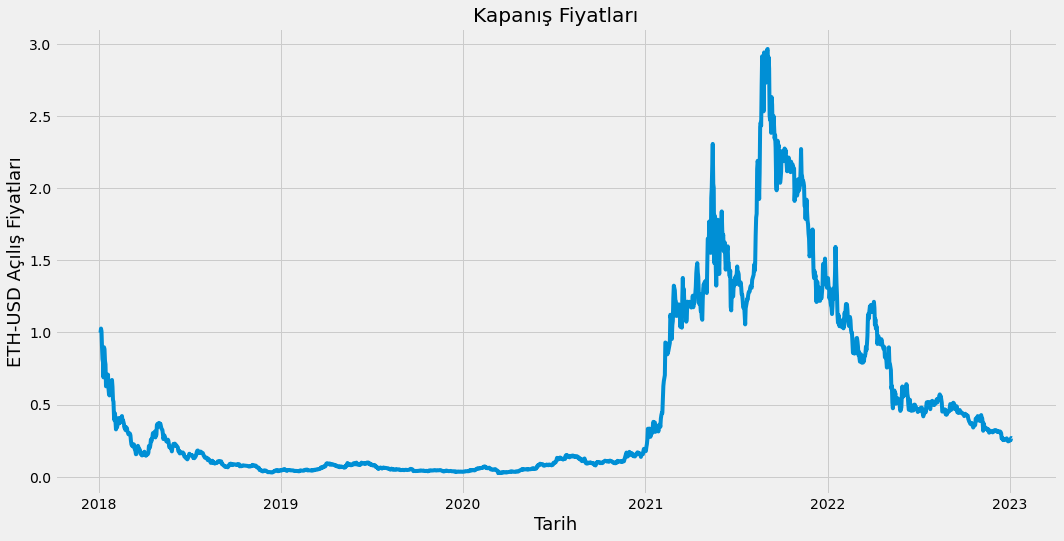

In [114]:
plt.figure(figsize=(16,8))
plt.title("Kapanış Fiyatları")
plt.plot(df['Close'])
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('ETH-USD Açılış Fiyatları', fontsize=18)


In [115]:
data= df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1462

In [116]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.3313539 ],
       [0.34072496],
       [0.33439743],
       ...,
       [0.07772194],
       [0.08277615],
       [0.08207989]])

In [117]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.3313539 , 0.34072496, 0.33439743, 0.29720054, 0.26858265,
       0.26123892, 0.22567536, 0.29669311, 0.29214734, 0.26434358,
       0.25630256, 0.20464508, 0.2055312 , 0.21597213, 0.21279818,
       0.23216184, 0.20011765, 0.18561325, 0.18310397, 0.20318971,
       0.20838182, 0.20358845, 0.20136414, 0.21951901, 0.203528  ,
       0.17252175, 0.16824294, 0.1350793 , 0.12450353, 0.14090891,
       0.12068901, 0.10305073, 0.11744543, 0.10749189, 0.11297269,
       0.12486627, 0.12971296, 0.11745087, 0.1223913 , 0.1186549 ,
       0.12666841, 0.13090034, 0.12901261, 0.13447168, 0.12283385,
       0.12482211, 0.12051104, 0.11564125, 0.10661697, 0.1091259 ,
       0.10155461, 0.10870984, 0.10677456, 0.10582391, 0.09802743,
       0.0952478 , 0.09154808, 0.09277147, 0.09402169, 0.09294673])]
[0.08878101864022352]

[array([0.3313539 , 0.34072496, 0.33439743, 0.29720054, 0.26858265,
       0.26123892, 0.22567536, 0.29669311, 0.29214734, 0.26434358,
       0.25630256, 0.20464508, 0.20

In [118]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [119]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1402, 60, 1)


In [120]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [121]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [122]:
model.fit(x_train,y_train, batch_size=1,epochs=5)

Epoch 1/5
1402/1402 [==============================] - 46s 30ms/step - loss: 0.0020
Epoch 2/5
1402/1402 [==============================] - 41s 29ms/step - loss: 0.0013
Epoch 3/5
1402/1402 [==============================] - 40s 28ms/step - loss: 0.0011
Epoch 4/5
1402/1402 [==============================] - 40s 28ms/step - loss: 7.7230e-04
Epoch 5/5
1402/1402 [==============================] - 41s 29ms/step - loss: 6.8409e-04


In [123]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
  

In [124]:
x_test = np.array(x_test)

In [125]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [126]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 19ms/step


In [127]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.006996066794988555

<ipython-input-128-87bcbd9c370a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahminler'] = predictions


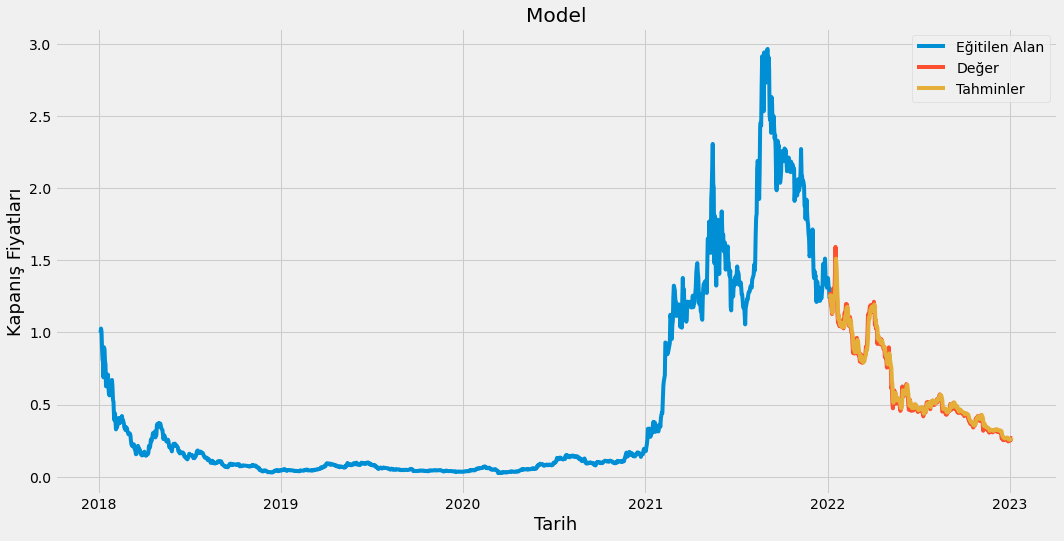

               Close  Tahminler
Date                           
2022-01-06  1.279782   1.245256
2022-01-07  1.211547   1.258855
2022-01-08  1.187512   1.218169
2022-01-09  1.173860   1.188300
2022-01-10  1.128052   1.170742
...              ...        ...
2023-01-01  0.249771   0.255012
2023-01-02  0.253828   0.257141
2023-01-03  0.252796   0.260401
2023-01-04  0.267677   0.261137
2023-01-05  0.265627   0.269747

[365 rows x 2 columns]


In [128]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Tahminler'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Tarih',fontsize=18)
plt.ylabel('Kapanış Fiyatları',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Tahminler']])
plt.legend(['Eğitilen Alan','Değer','Tahminler'])
plt.show()
print(valid)